<a href="https://colab.research.google.com/github/watayagorn/Analytical_Khunsanta/blob/main/ROC_curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files

# Prompt the user to upload a file
uploaded = files.upload()

# Display the uploaded file information
for filename, content in uploaded.items():
    print(f'File "{filename}" with size {len(content)} bytes uploaded successfully.')


Saving AI analyze_211123.xlsx to AI analyze_211123.xlsx
File "AI analyze_211123.xlsx" with size 501529 bytes uploaded successfully.


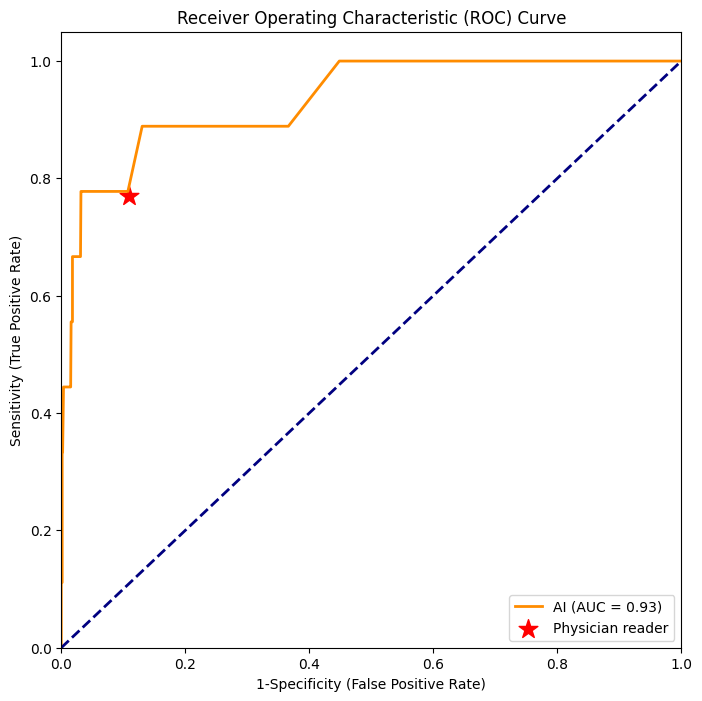

In [48]:
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Load the Excel file into a DataFrame
file_path = 'AI analyze_211123.xlsx'  # Replace with the actual path to your Excel file
df = pd.read_excel(file_path)

# Check if the required columns "ai-score" and "xpert" exist
if "ai_score" not in df.columns or "xpert" not in df.columns:
    print("Error: Columns 'ai-score' and/or 'xpert' not found in the DataFrame.")
else:
    # Drop rows with missing values in "ai-score" or "xpert" columns
    df = df.dropna(subset=["ai_score", "xpert"])

    # Calculate ROC curve metrics
    fpr, tpr, thresholds = roc_curve(df["xpert"], df["ai_score"])
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AI (AUC = {roc_auc:.2f})')

    expert_tpr = 0.77
    expert_fpr = 1-0.89
#  plt.scatter(expert_fpr, expert_tpr, color='red', marker='o', label='Expert Opinion (0.1 FPR, 0.9 TPR)')
    plt.scatter(expert_fpr, expert_tpr, color='red', s=200, marker='*', label='Physician reader')

    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('1-Specificity (False Positive Rate)')
    plt.ylabel('Sensitivity (True Positive Rate)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


